## Taking a look at employee data from Company X to see what factors can be used to predict attrition and make suggestions for HR accordingly

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv('Employee.csv')

In [225]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [226]:
data.size

41877

In [227]:
data.info

<bound method DataFrame.info of       Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes

In [2]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [14]:
data.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

## Basic Graphs of Each Catagory

Text(0, 0.5, 'Count')

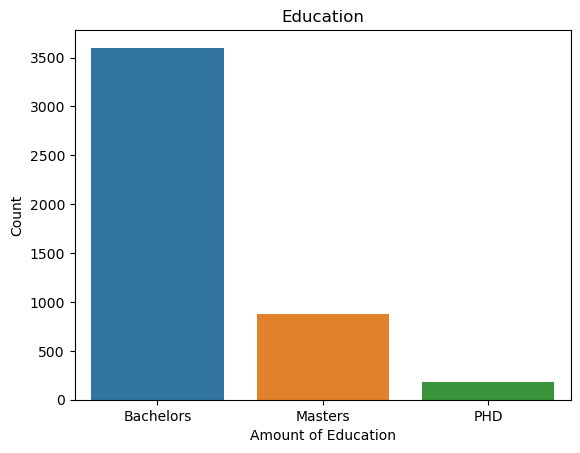

In [24]:
sns.countplot(data=data, x='Education')
plt.title('Education')
plt.xlabel('Amount of Education')
plt.ylabel('Count')

Text(0.5, 0, 'Year')

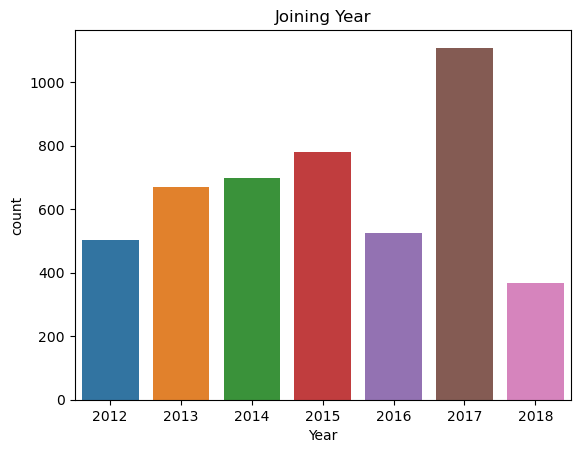

In [228]:
sns.countplot(data=data, x='JoiningYear')
plt.title('Joining Year')
plt.xlabel('Joining Year')
plt.xlabel('Year')

Text(0.5, 0, 'Number of Employees')

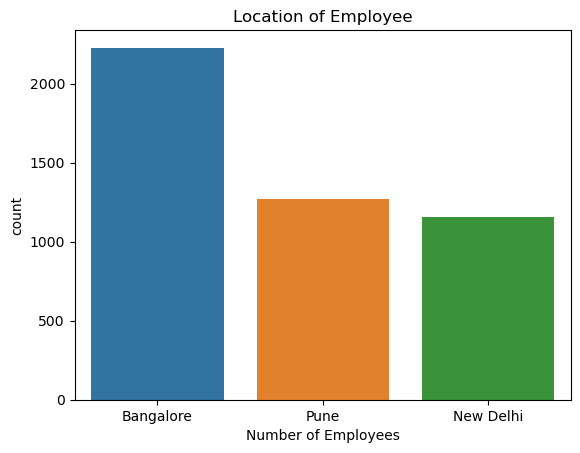

In [48]:
sns.countplot(data=data, x='City')
plt.title('Location of Employee')
plt.xlabel('City')
plt.xlabel('Number of Employees')

Text(0, 0.5, 'Number of Employees')

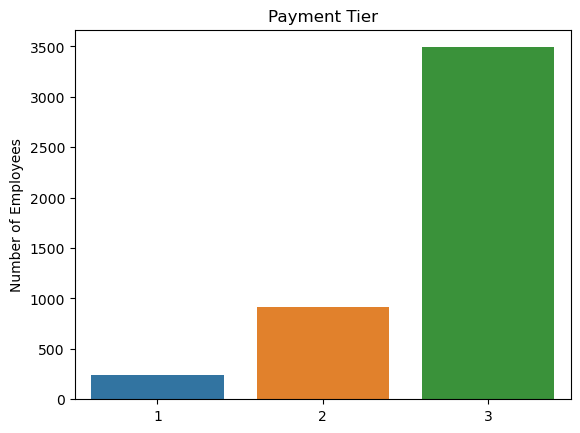

In [25]:
sns.countplot(data=data, x='PaymentTier')
plt.title('Payment Tier')
plt.xlabel('')
plt.ylabel('Number of Employees')

Text(0, 0.5, 'Count')

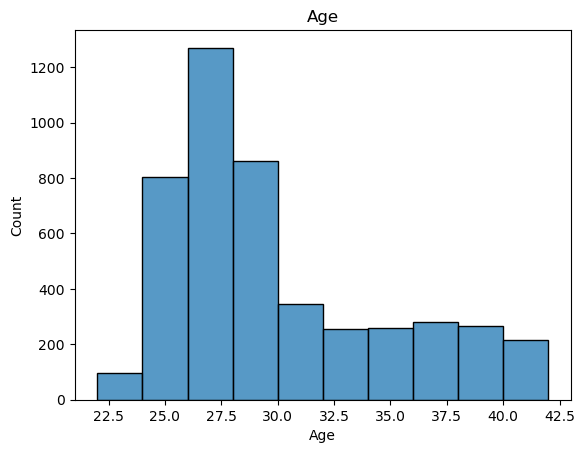

In [26]:
sns.histplot(data['Age'], binwidth=2)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Employees')

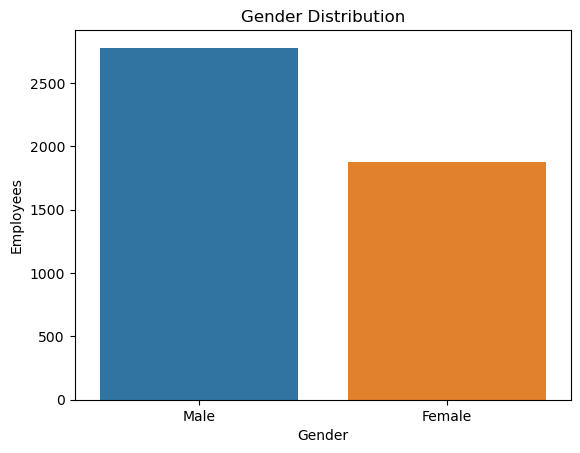

In [28]:
sns.countplot(data=data, x="Gender")
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Employees')

Text(0, 0.5, 'Number of Employees')

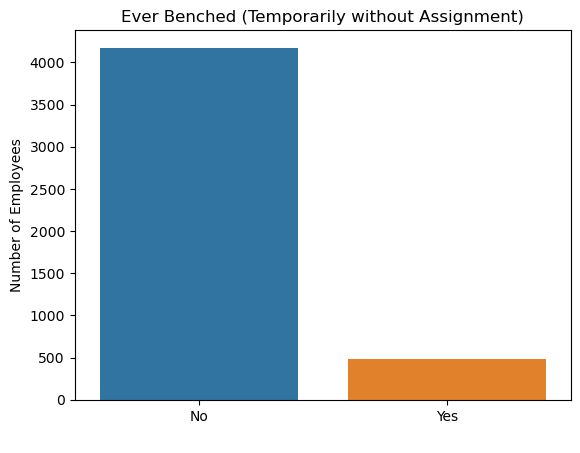

In [29]:
sns.countplot(data=data, x='EverBenched')
plt.title('Ever Benched (Temporarily without Assignment)')
plt.xlabel(' ')
plt.ylabel('Number of Employees')

Text(0.5, 0, 'Years')

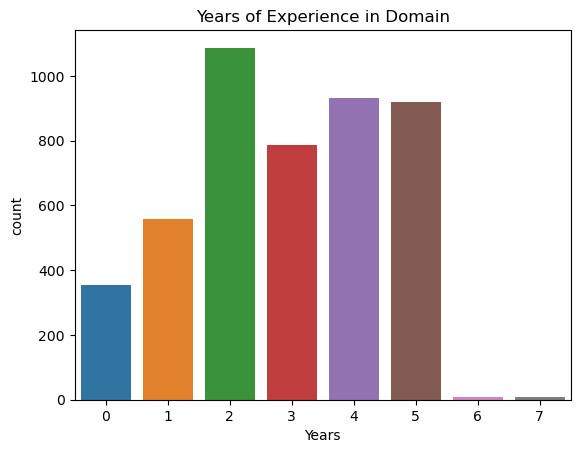

In [30]:
sns.countplot(data=data, x='ExperienceInCurrentDomain')
plt.title('Years of Experience in Domain')
plt.xlabel('Years')


## Graphs of all Categories against LeaveOrNot using count and percentage

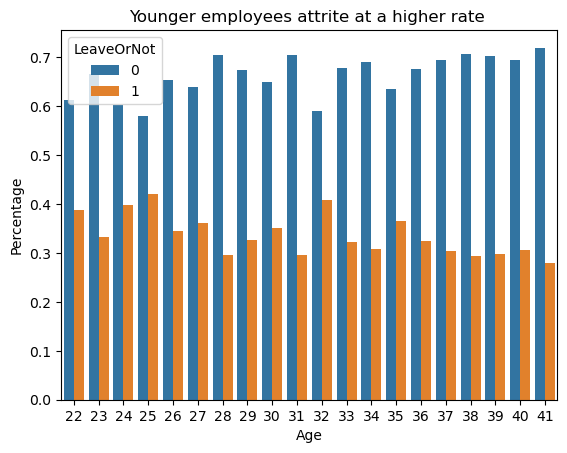

In [6]:
data_age= data.groupby('Age')['LeaveOrNot'].value_counts(normalize= True)
data_age= data_age.reset_index()


ax = sns.barplot(x=data_age["Age"], y=data_age['proportion'], hue=data_age['LeaveOrNot'])



plt.ylabel('Percentage')
plt.xlabel('Age')
plt.title('Younger employees attrite at a higher rate ')

plt.show()

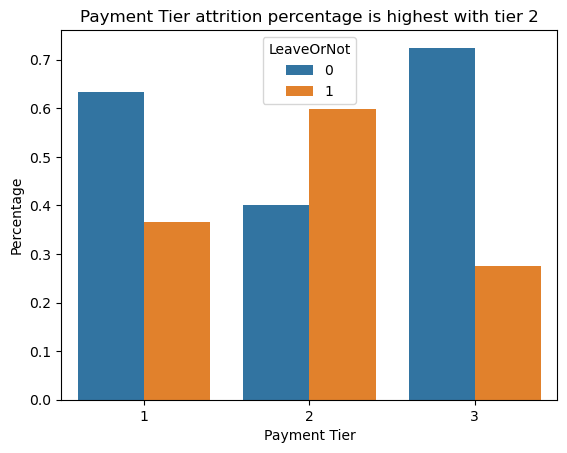

In [10]:
data_pt= data.groupby('PaymentTier')['LeaveOrNot'].value_counts(normalize= True)
data_pt= data_pt.reset_index()


ax = sns.barplot(x=data_pt["PaymentTier"], y=data_pt['proportion'], hue=data_pt['LeaveOrNot'])
plt.ylabel('Percentage')
plt.xlabel('Payment Tier')
plt.title('Payment Tier attrition percentage is highest with tier 2')


plt.show()

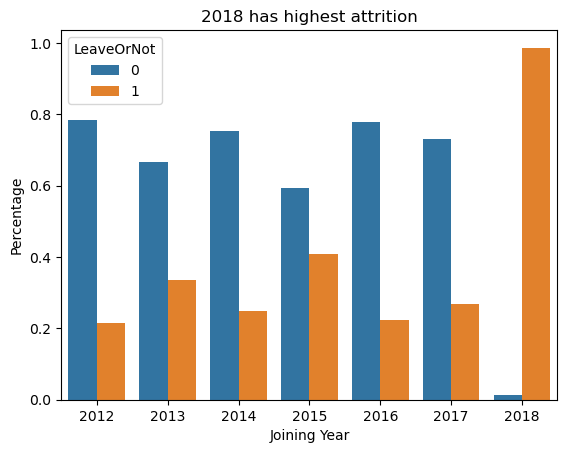

In [11]:
data_jy= data.groupby('JoiningYear')['LeaveOrNot'].value_counts(normalize= True)
data_jy= data_jy.reset_index()


ax = sns.barplot(x=data_jy["JoiningYear"], y=data_jy['proportion'], hue=data_jy['LeaveOrNot'])
plt.ylabel('Percentage')
plt.xlabel('Joining Year')
plt.title('2018 has highest attrition')


plt.show()

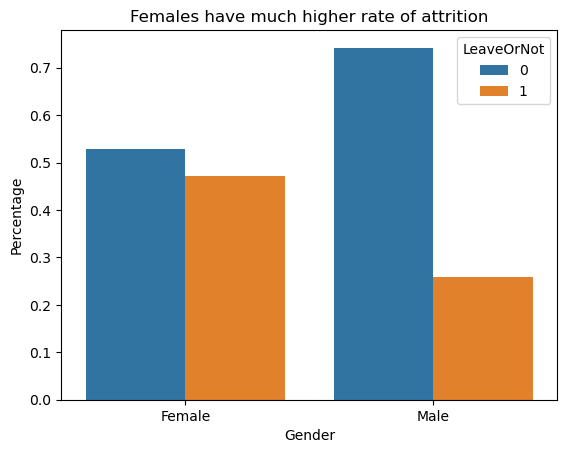

In [14]:
data_gender= data.groupby('Gender')['LeaveOrNot'].value_counts(normalize= True)
data_gender= data_gender.reset_index()


ax = sns.barplot(x=data_gender["Gender"], y=data_gender['proportion'], hue=data_gender['LeaveOrNot'])
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.title('Females have much higher rate of attrition')


plt.show()

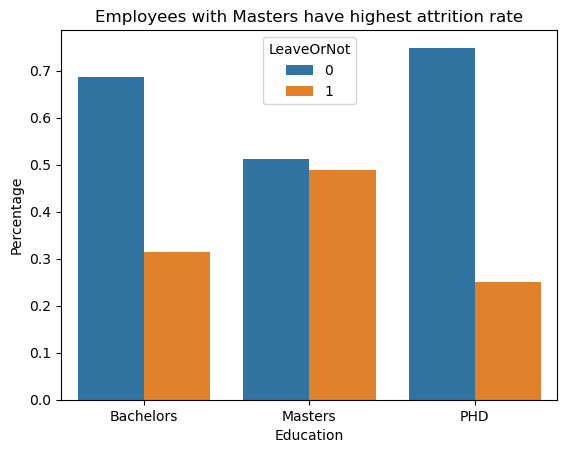

In [16]:
data_ed= data.groupby('Education')['LeaveOrNot'].value_counts(normalize= True)
data_ed= data_ed.reset_index()


ax = sns.barplot(x=data_ed["Education"], y=data_ed['proportion'], hue=data_ed['LeaveOrNot'])
plt.ylabel('Percentage')
plt.xlabel('Education')
plt.title('Employees with Masters have highest attrition rate')


plt.show()

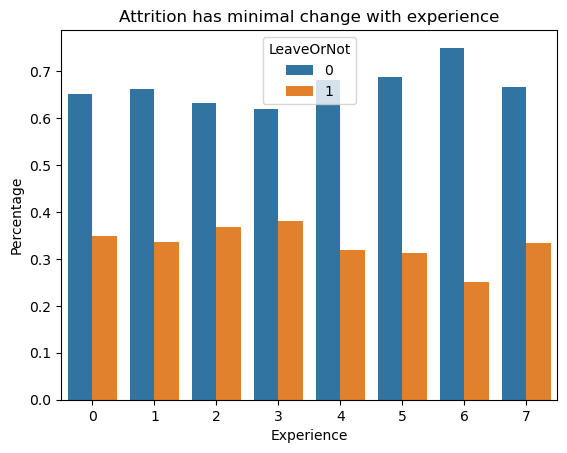

In [18]:
data_ex= data.groupby('ExperienceInCurrentDomain')['LeaveOrNot'].value_counts(normalize= True)
data_ex= data_ex.reset_index()


ax = sns.barplot(x=data_ex["ExperienceInCurrentDomain"], y=data_ex['proportion'], hue=data_ex['LeaveOrNot'])
plt.ylabel('Percentage')
plt.xlabel('Experience')
plt.title('Attrition has minimal change with experience')


plt.show()

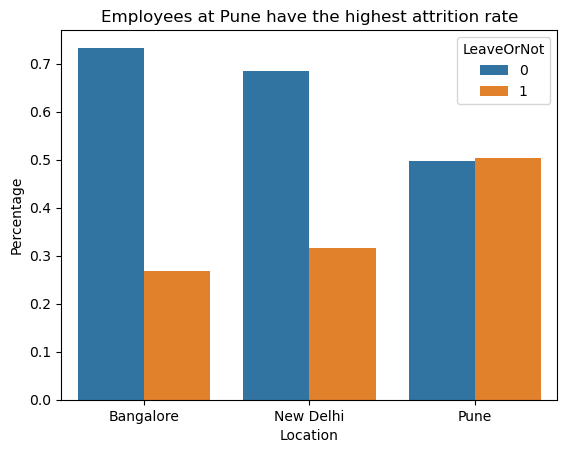

In [19]:
data_city= data.groupby('City')['LeaveOrNot'].value_counts(normalize= True)
data_city= data_city.reset_index()


ax = sns.barplot(x=data_city["City"], y=data_city['proportion'], hue=data_city['LeaveOrNot'])
plt.ylabel('Percentage')
plt.xlabel('Location')
plt.title('Employees at Pune have the highest attrition rate')


plt.show()

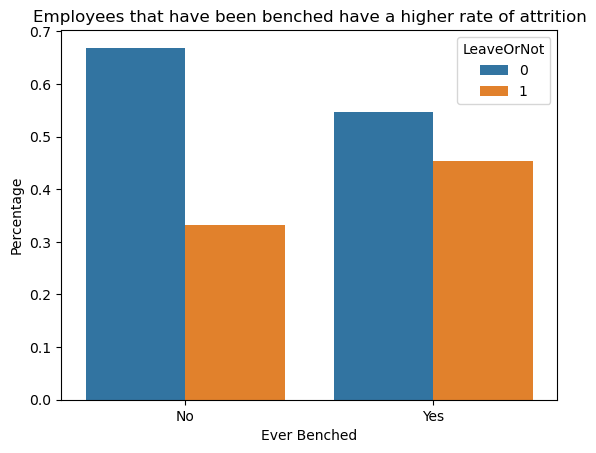

In [21]:
data_eb= data.groupby('EverBenched')['LeaveOrNot'].value_counts(normalize= True)
data_eb= data_eb.reset_index()

ax = sns.barplot(x=data_eb["EverBenched"], y=data_eb['proportion'], hue=data_eb['LeaveOrNot'])
plt.ylabel('Percentage')
plt.xlabel('Ever Benched')
plt.title('Employees that have been benched have a higher rate of attrition')


plt.show()

## Heatmap of the Correlation of Categories 
Paying particular attention to each category and LeaveOrNot

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Education"]= le.fit_transform(data["Education"])
data["City"]=le.fit_transform(data["City"])
data["Gender"]=le.fit_transform(data["Gender"])
data["EverBenched"]=le.fit_transform(data["EverBenched"])

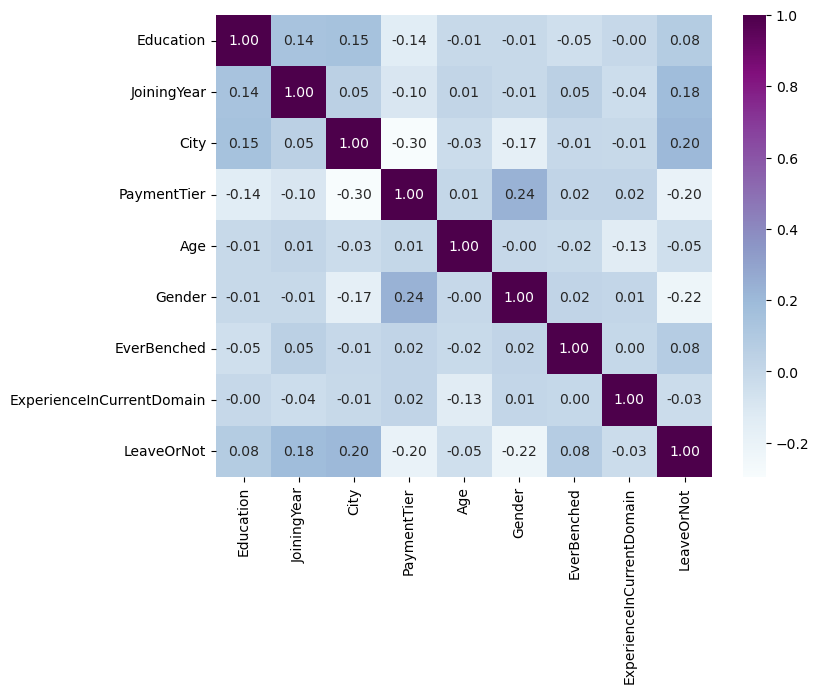

In [26]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(),annot = True,fmt = '.2f',cmap = 'BuPu')
plt.show()

## Looking at the Precision-Recalls curves and ROCc of different prediction models
Starting with all the categories, followed by the top 4, top 6, and everything minus ExperienceInCurrentDomain


Testing the first model with all factors

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop(columns=['LeaveOrNot'])
y = data['LeaveOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




In [173]:
X_train

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
4291,1,2014,1,3,28,1,0,5
4326,0,2014,0,3,38,1,0,3
3976,1,2018,0,3,39,0,0,6
2856,0,2016,2,2,29,1,0,3
2130,0,2012,0,3,26,1,0,4
...,...,...,...,...,...,...,...,...
3210,0,2012,0,3,32,0,0,1
3603,1,2017,1,1,36,0,0,0
3432,1,2017,1,2,36,1,1,2
2685,0,2016,0,2,30,0,0,4


In [192]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [193]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression(random_state= 0).fit(X_train_scaled, y_train)
log_reg.predict_proba(X_train_scaled)


array([[0.56142233, 0.43857767],
       [0.74512706, 0.25487294],
       [0.8484974 , 0.1515026 ],
       ...,
       [0.64610904, 0.35389096],
       [0.65007706, 0.34992294],
       [0.64293794, 0.35706206]])

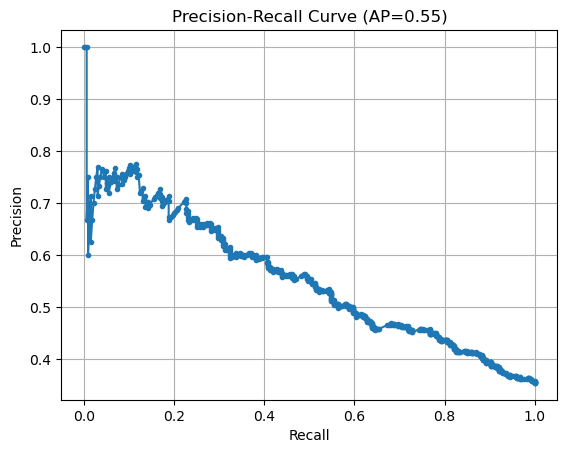

In [194]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_true= y_test
y_prob = model.predict_proba(X_test_scaled)[:, 1]  
precision, recall, thresholds = precision_recall_curve(y_true, y_prob)


average_precision = average_precision_score(y_true, y_prob)


plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={:.2f})'.format(average_precision))
plt.grid(True)
plt.show()

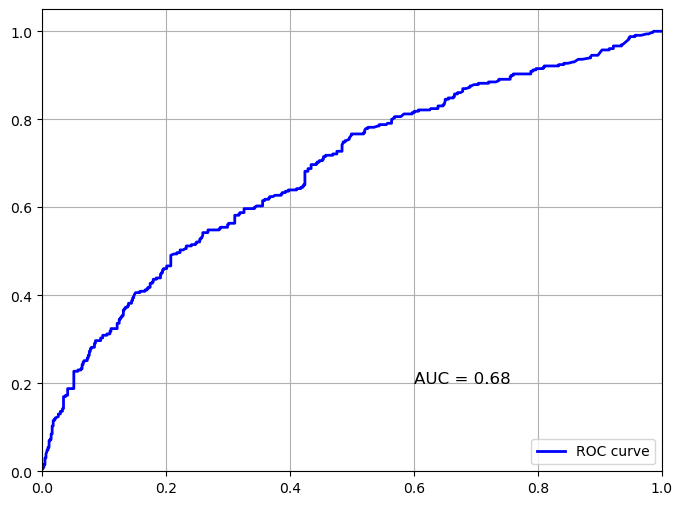

In [195]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
auc_score = roc_auc_score(y_true, y_prob)
plt.text(0.6, 0.2, 'AUC = {:.2f}'.format(auc_score), fontsize=12)

# Set plot limits and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.grid(True)


Testing second model with top four factors.

In [196]:
X_top4 = data.drop(columns=['LeaveOrNot', 'Education', 'Age', "EverBenched", 'ExperienceInCurrentDomain'])
y_top4 = data['LeaveOrNot']

X_train, X_test, y_train, y_test = train_test_split(X_top4, y_top4, test_size=0.2)
X_train.head()

,JoiningYear,City,PaymentTier,Gender
833,2013,1,2,0
4624,2017,0,3,1
3208,2015,2,2,0
45,2014,0,3,0
706,2015,0,3,1


In [197]:
X_train_scaled_top4= scaler.fit_transform(X_train)
X_test_scaled_top4= scaler.transform(X_test)

In [198]:
log_reg= LogisticRegression(random_state= 0).fit(X_train_scaled_top4, y_train)
log_reg.predict_proba(X_train_scaled_top4)

array([[0.59723989, 0.40276011],
       [0.73858345, 0.26141655],
       [0.39251798, 0.60748202],
       ...,
       [0.8464967 , 0.1535033 ],
       [0.39251798, 0.60748202],
       [0.81524567, 0.18475433]])

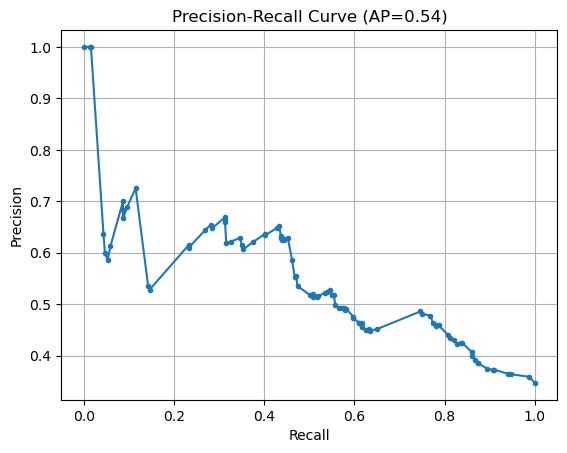

In [199]:

model = LogisticRegression()
model.fit(X_train_scaled_top4, y_train)
y_true= y_test
y_prob = model.predict_proba(X_test_scaled_top4)[:, 1]  
precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
average_precision = average_precision_score(y_true, y_prob)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={:.2f})'.format(average_precision))
plt.grid(True)
plt.show()

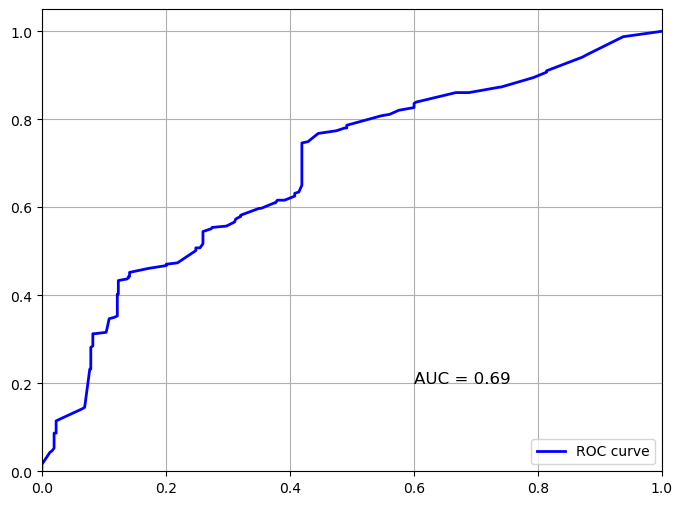

In [201]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
auc_score = roc_auc_score(y_true, y_prob)
plt.text(0.6, 0.2, 'AUC = {:.2f}'.format(auc_score), fontsize=12)

# Set plot limits and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.grid(True)

Testing third model with top 6 factors

In [219]:
X = data.drop(columns=['LeaveOrNot', 'Age','ExperienceInCurrentDomain'])
y = data['LeaveOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,Education,JoiningYear,City,PaymentTier,Gender,EverBenched
2615,0,2016,0,3,1,1
51,0,2015,2,2,0,0
675,0,2017,2,2,0,0
445,1,2012,2,3,1,0
3750,0,2017,2,3,1,0


In [221]:
model = LogisticRegression()
model.fit(X_train_scaled_top6, y_train)
log_reg= LogisticRegression(random_state= 0).fit(X_train_scaled_top6, y_train)
log_reg.predict_proba(X_train_scaled_top6)

array([[0.69354286, 0.30645714],
       [0.41600167, 0.58399833],
       [0.31996493, 0.68003507],
       ...,
       [0.75548832, 0.24451168],
       [0.7325039 , 0.2674961 ],
       [0.7894    , 0.2106    ]])

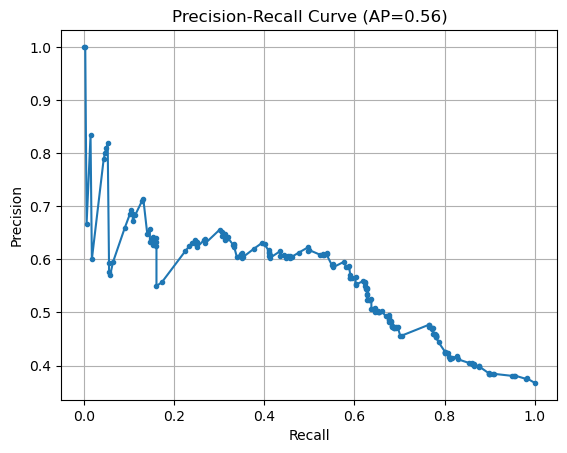

In [222]:
model = LogisticRegression()
model.fit(X_train_scaled_top6, y_train)
y_true= y_test
y_prob = model.predict_proba(X_test_scaled_top6)[:, 1]  
precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
average_precision = average_precision_score(y_true, y_prob)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={:.2f})'.format(average_precision))
plt.grid(True)
plt.show()

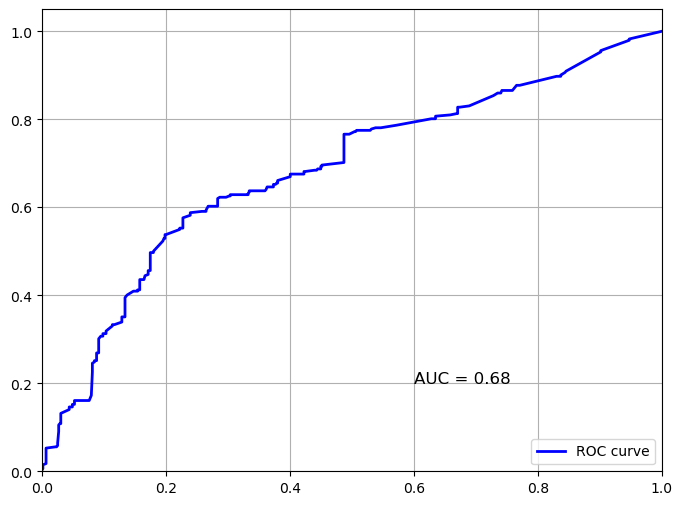

In [223]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
auc_score = roc_auc_score(y_true, y_prob)
plt.text(0.6, 0.2, 'AUC = {:.2f}'.format(auc_score), fontsize=12)

# Set plot limits and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.grid(True)

Final model with top 7 factors (excluding only ExperienceInCurrentDomain)

In [202]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['City'] = label_encoder.fit_transform(data['City'])
data['EverBenched'] = label_encoder.fit_transform(data['EverBenched'])
X_sinex = data.drop(columns=['LeaveOrNot', 'ExperienceInCurrentDomain'])
y_sinex = data['LeaveOrNot']

X_train, X_test, y_train, y_test = train_test_split(X_sinex, y_sinex, test_size=0.2)
X_train.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched
82,0,2016,0,3,38,1,0
2277,0,2014,1,3,27,0,0
1913,1,2017,1,2,25,0,0
713,0,2016,2,2,27,0,0
3011,0,2018,0,3,32,0,0


In [203]:
X_train_scaled_sinx= scaler.fit_transform(X_train)
X_test_scaled_sinx= scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled_sinx, y_train)
log_reg= LogisticRegression(random_state= 0).fit(X_train_scaled_sinx, y_train)
log_reg.predict_proba(X_train_scaled_sinx)

array([[0.83505865, 0.16494135],
       [0.63214835, 0.36785165],
       [0.34791433, 0.65208567],
       ...,
       [0.48278854, 0.51721146],
       [0.66242753, 0.33757247],
       [0.89526332, 0.10473668]])

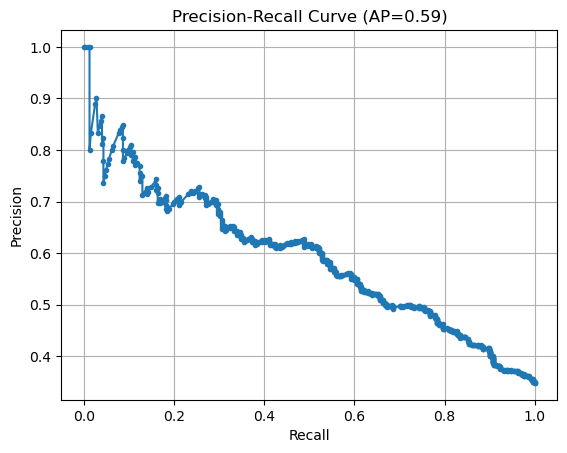

In [204]:
model = LogisticRegression()
model.fit(X_train_scaled_sinx, y_train)
y_true= y_test
y_prob = model.predict_proba(X_test_scaled_sinx)[:, 1]  
precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
average_precision = average_precision_score(y_true, y_prob)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={:.2f})'.format(average_precision))
plt.grid(True)
plt.show()

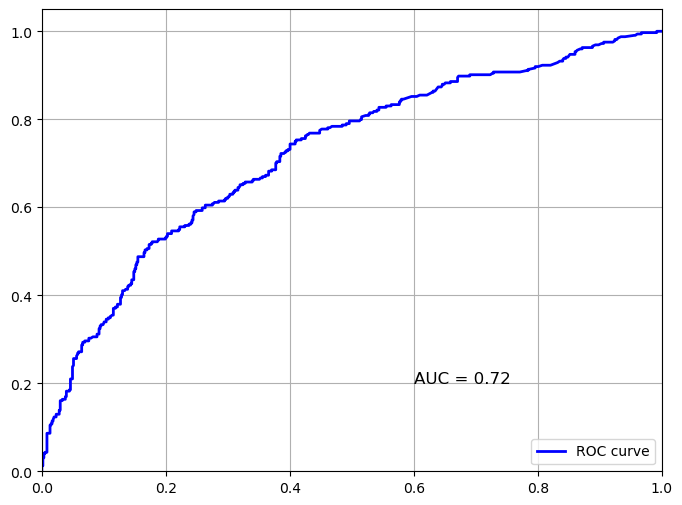

In [205]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
auc_score = roc_auc_score(y_true, y_prob)
plt.text(0.6, 0.2, 'AUC = {:.2f}'.format(auc_score), fontsize=12)

# Set plot limits and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.grid(True)

## Summary

-Looking at the graphs of each category against Leave or Not we see some groups that stand out. Payment Tier 2, Joining Year 2018, Females, Pune, those with Masters and that have benched had a higher precent of attrition than others in their category. My suggestion to HR would be to talk to those that have not left in these areas for more insight and possibly techniques that would aid in retaining these employees. 

-Looking at the heat map we see that Payment Tier, Joining Year, Gender and City have the highest correlation with attrition. 

-Taking a look at Precision-Recall curves and ROC curves, we find the best model for attrition is one that takes into consideration Age, Gender, Payment Tier, Joining Year, Education, City, and if an employee has ever been benched. 

-My final suggestion would be to consider the top 20% of employees at risk of attrition and what can be done to retain them. Considerations should be taken to assess what kind of package or benefits can be offered to retain these employees and compare to the ROI of training new employees to fill these positions should they be lost. A futrue model could be run to aid with this decision once the costs are determined. 

-Also as a caution for hiring Age, Gender, and City are protected class categories and cannot be used to rule out possible future employees and compensation. Legal counsel may need to be consulted to determine what HR decisions can be made based on these models. 
